<a href="https://colab.research.google.com/github/jsblandon/mc-i-applications/blob/main/app01/mci_app01_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Aplicación 01 - Métodos Cuantitativos I</center>
## <center> Ingeniería Agroambiental </center>
###  <center> Universidad Tecnológica - UTEC </center>
### <center> Juan Blandón </center>
<center> 2022 - I </center>

El contenido a continuación hace parte de [The Biology Project](http://www.biology.arizona.edu/). Se modificó parcialmente el contenido de [Trigonometric Functions Applications
Environmental Fluctuations](http://www.biology.arizona.edu/biomath/tutorials/trigonometric/Applications/EnFluct.html) para adaptarlo al contexto de IAGRO.

Los organismos están influenciados por las condiciones ambientales. De hecho, existen ambientes cuyas condiciones son intolerables para ciertas especies. Por ejemplo, la temperatura, el clima, la presencia de competidores y la disponibilidad de recursos son factores que determinan la superviviencia de alguna especie. En algunos casos pueden emerger insectos como la cigarra, la aceleración de los ciclos de vida de algunos anfibios cuando los recursos hídricos disminuyen, la reproducción estacional de algunas especies, y el ciclo de vida de especies propias de los desiertos.

En este primer práctico del curso de Métodos Cuantitativos I nos encargaremos de resolver una serie de problemas y validaremos con este cuaderno los resultados que obtengamos. Ahora, supondremos un caso hipotético donde usted es Ingenier@ Agroambiental y quiere descubrir las condiciones de temperatura bajo las cuales una especie invasora de insectos puede reproducirse y afectar un cultivo. En el laboratorio usted varía periódicamente la temperatura de acuerdo a la siguiente función trigonométrica:

$$T(t) = 72 - 19 cos \left(\frac{\pi}{12} (t-4)\right),$$



donde $T$ representa la temperatura en grados Farenheit ($°F$) y $t$ representa el tiempo en horas (donde $t = 0$ corresponde al inicio del experimento). Se asume que los otros factores ambientales permanecen constantes durante el experimento.

Use la ecuación anterior para responder las siguientes preguntas:

* ¿Cuál es la temperatura ambiental aproximada luego de 5 horas y 30 minutos de haber iniciado el experimento?

* ¿Cuál es la temperatura más alta alcanzada durante el experimento?

* Si se sabe que la temeperatura mínima se alcanza 4 horas después de haber iniciado el experimento, calcule cuántas horas deben pasar luego de haber iniciado el experimento para que la temperatura sea maximizada.

* ¿Cuántas veces la temperatura del ambiente alcanza los $83.1°F$ en el transcurso de 24 horas?

Para la interacción con el cuaderno se requiere importar una serie de librerías de Python:

In [ ]:
%matplotlib inline

In [ ]:
# Librerías
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML

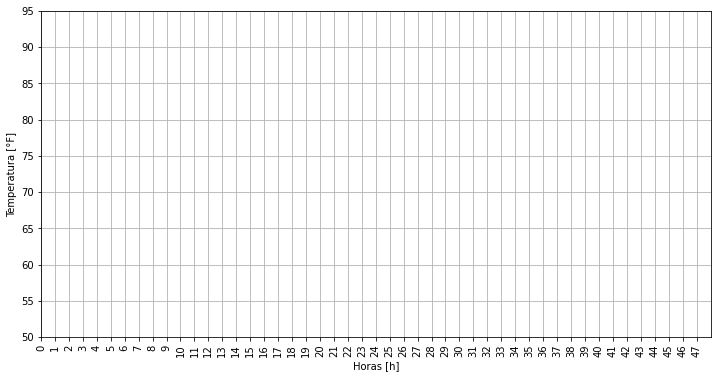

In [ ]:
# Se genera un gráfico de la función en cuestión. Vamos a animar esa gráfica. 
# Para ello vamos a definir una serie de elementos que se van a ir actualizando:
fig, ax = plt.subplots(figsize = (12,6))

# Se agrega un título y leyendas a los ejes
plt.title("Temperatura Ambiente vs Tiempo")
plt.xlabel("Horas [h]")
plt.ylabel("Temperatura [°F]")

# Se fijan los límites de la gráfica
ax.set_ylim([50,95])
ax.set_xlim([0,48])

# Se agregan líneas guía
ax.grid(True)

# Título modificable
titulo = ax.set_title('')

# Grafica completa
evolucion_temp, = ax.plot(# Valores del eje x en horas
                         [], 
                         # Valores del eje y en °F
                         [], 
                         # Color de la línea
                         'k',
                         # Ancho de línea
                         lw = 2)

# Grafica de valor puntual de temperatura
valor_temp, = ax.plot(# Valor del eje x en horas
                     [],
                     # Valor del eje y en °F
                     [],
                     # Color del punto
                     'or',
                     # Ancho del punto
                     lw = 50)

# Se cambia la resolución del eje x
ax.xaxis.set_ticks(np.arange(0, 48, 1))

# Se rotan las etiquetas de los ejes
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Función de animación

def dibujar(n):
    r""" Función para animar la gráfica

    Recibe:
    -------
    n : int
        Valor del frame

    Devuelve:
    ---------
    evolucion_temp : fig
        Objeto de Matplotlib que grafica la evolución temporal total

    valor_temp : fig
        Objeto de Matplotlib que grafica un valor puntual
    """
    # Se define una variable que almacena los valores en el tiempo
    tiempo = np.round(np.linspace(0,48,490*2),1)
    
    # Se declara la función de temperatura
    Temperatura = 72 - 19* np.cos((np.pi/12)*(tiempo-4))

    # Se fijan los datos de la gráfica que representa la hsitoria total
    evolucion_temp.set_data(tiempo,Temperatura)

    # Se fija el dato de temperatura que cambiará conforme avance el tiempo
    valor_temp.set_data(n/5.0,72 - 19* np.cos((np.pi/12)*(n/5.0 - 4)))  

    # Se actualiza el título de la gráfica conforme el valor puntual
    titulo.set_text('Hora = {hora}, Temperatura = {temp}'.format(hora = n/5.0, 
                                                                 temp = 72 - 19* np.cos((np.pi/12)*(n/5.0 - 4))))

    return (evolucion_temp, valor_temp)

In [ ]:
# Se genera la animación
anim = animation.FuncAnimation(fig, dibujar, frames=250, interval=150, blit=True)

In [ ]:
# Se genera el vídeo incrustado al cuaderno
HTML(anim.to_html5_video())